In [1]:
import adddeps
from pltconf import *
from utils.utils import standartize
import numpy as np
from scipy.stats import norm,normaltest, probplot

import pandas as pd
import sys, os
import re

In [2]:
df = pd.read_csv("ERlong-523-0.0380-705000-(1200).h5.plus.csv", 
                 header=None).set_axis(["time",'noneq', '_', 'quasieq', 'T', 'O', 'L', 'fromL'], axis=1)
df2 = pd.read_csv("g3-at-50.csv",header=None).set_axis(["time",'50/g3'], axis=1)

In [3]:
df2.shape, df.shape

((3472, 2), (2993, 8))

In [4]:
def smooth(x, y, dx):
    y_std = []
    y_mean = []
    for xc in x:
        filt = (x>xc-dx)&(x<xc+dx)
        xs = x[filt]
        ys = y[filt]
        if len(xs) >= np.inf:
            a, b, c = np.polyfit(xs, ys, 2)
            y1 = a * xs*xs + b * xs + c
            y_std.append((ys-y1).std())
            y_mean.append(a * xc*xc + b * xc + c)
        elif len(xs) >= 2:
            a, b = np.polyfit(xs, ys, 1)
            y1 = a * xs + b
            y_std.append((ys-y1).std())
            y_mean.append(a*xc + b)
        else:
            y_std.append(0)
            y_mean.append(ys[0])

    y_std = np.array(y_std)
    y_mean = np.array(y_mean)
    
    return y_mean, y_std



In [5]:
from matplotlib.ticker import ScalarFormatter
x_formatter = ScalarFormatter(useMathText=True)
x_formatter.set_powerlimits((-3, 3))  # Adjust the power limits as needed

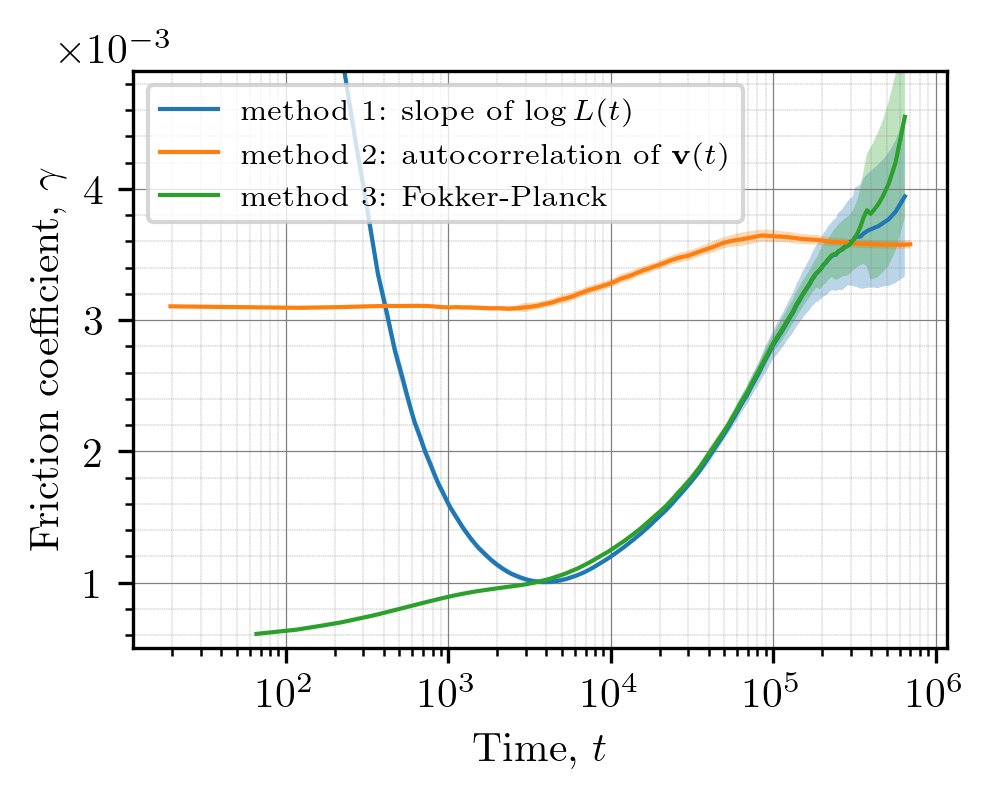

In [6]:
ax = plt.gca()
ax.yaxis.set_major_formatter(x_formatter)
ax.yaxis.get_offset_text().set_x(-0.09)

def smooth_plot(x, y, label=""):
    
    y_mean, y_std = smooth(np.log(x), y, 0.5)
    def trim(arr):
        return np.concatenate([arr[:20], arr[20:200:3], arr[200::30]])

    x, y_mean, y_std = trim(x), trim(y_mean), trim(y_std)

    plt.plot(x, y_mean, lw=1,  alpha=1,label=label)
    plt.fill_between(x, y_mean-1*y_std, y_mean+1*y_std,
        alpha=0.3,
    )

x = df.time.values
y = df.fromL.values
smooth_plot(x,y, label=r"method 1: slope of $\log L(t)$")

x = df2.time.values
y = df2["50/g3"].values
smooth_plot(x,y, label=r"method 2: autocorrelation of ${\bf v}(t)$")

x = df.time.values
y = df.noneq.values
smooth_plot(x,y, label=r"method 3: Fokker-Planck")


# plt.hlines(y=0.0037, xmin=1e5, xmax=7e5, ls="--", color="k")
plt.legend(fontsize=7)

plt.xscale("log")
plt.ylim(0.0005,0.0049)
plt.xlabel("Time, $t$")
plt.ylabel("Friction coefficient, $\gamma$")

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.3', color='gray')
plt.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# plt.tight_layout(pad=0)
plt.savefig("gamma.pdf",bbox_inches='tight')


In [7]:
names = [
'ER300.6-523-0.0155-205000-(1553).h5',
'ER300.15-523-0.0195-205000-(1592).h5',
 'ER300.25-523-0.0228-205000-(1594).h5',
 'ER300.35-523-0.0258-205000-(1455).h5',
 'ER300.45-523-0.0283-205000-(1541).h5',
 'ER300.55-523-0.0312-205000-(1515).h5',
     'ERlong-523-0.0380-705000-(1200).h5',
 ]
mathematica_exports = "./mahtematica_exports/"

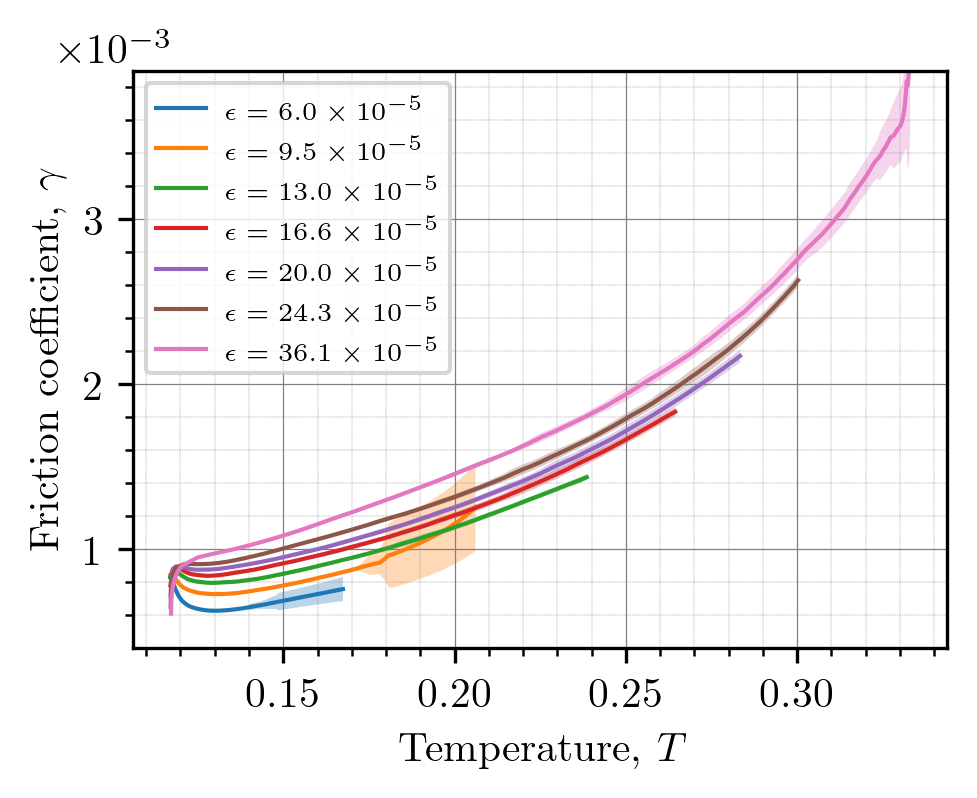

In [8]:
for name in names:
    ecc = float(re.findall(r"^.+\-\d+\-([\d\.]+)\-\d+\-\(\d+\).h5$",name)[0])
    eps = ecc**2/4
    label = f"$\epsilon={eps*1e5:0.1f}"+r"\times 10^{-5}$"

    df = pd.read_csv(os.path.join(mathematica_exports, name+".plus.csv")
                   , header=None).set_axis(["time",'noneq', '_', 'quasieq', 'T', 'O', 'L', 'fromL'], axis=1)
    x = df.time.values
    y = df.noneq.values
    x1 = df["T"].values

    y_mean, y_std = smooth(np.log(x), y, 0.5)
    
    def trim(arr):
        return np.concatenate([arr[:20], arr[20:200:15], arr[200::30]])
    x1, y_mean, y_std = trim(x1), trim(y_mean), trim(y_std)
    
    plt.plot(x1, y_mean, lw=1, alpha=1, label=label)
    plt.fill_between(x1, y_mean-1*y_std, y_mean+1*y_std,
        alpha=0.3,
    )

ax = plt.gca()
ax.yaxis.set_major_formatter(x_formatter)
ax.yaxis.get_offset_text().set_x(-0.09)

plt.legend(fontsize=6)
plt.xlabel("Temperature, $T$")
plt.ylabel("Friction coefficient, $\gamma$")

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.3', color='gray')
plt.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# plt.xlim(0.11, 0.33)
plt.ylim(0.4e-3, 3.9e-3)

# plt.tight_layout(pad=0)
plt.savefig("gamma-T.pdf",bbox_inches='tight')

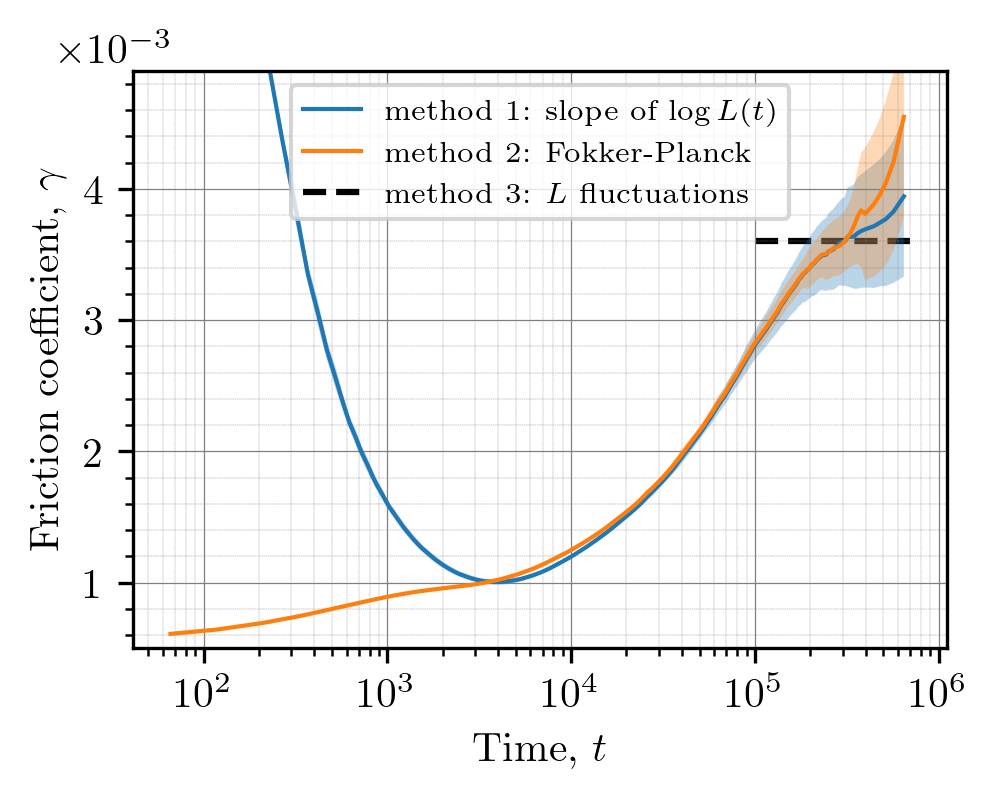

In [11]:
ax = plt.gca()
ax.yaxis.set_major_formatter(x_formatter)
ax.yaxis.get_offset_text().set_x(-0.09)

def smooth_plot(x, y, label=""):
    
    y_mean, y_std = smooth(np.log(x), y, 0.5)
    def trim(arr):
        return np.concatenate([arr[:20], arr[20:200:3], arr[200::30]])

    x, y_mean, y_std = trim(x), trim(y_mean), trim(y_std)

    plt.plot(x, y_mean, lw=1,  alpha=1,label=label)
    plt.fill_between(x, y_mean-1*y_std, y_mean+1*y_std,
        alpha=0.3,
    )

x = df.time.values
y = df.fromL.values
smooth_plot(x,y, label=r"method 1: slope of $\log L(t)$")

x = df.time.values
y = df.noneq.values
smooth_plot(x,y, label=r"method 2: Fokker-Planck")

plt.hlines(y=0.0036, xmin=1e5, xmax=7e5, ls="--", color="k", label=r"method 3: $L$ fluctuations", zorder=0)



# plt.hlines(y=0.0037, xmin=1e5, xmax=7e5, ls="--", color="k")
plt.legend(fontsize=7)

plt.xscale("log")
plt.ylim(0.0005,0.0049)
plt.xlabel("Time, $t$")
plt.ylabel("Friction coefficient, $\gamma$")

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.3', color='gray')
plt.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# plt.tight_layout(pad=0)
plt.savefig("gamma.pdf",bbox_inches='tight')
